# House Prices Prediction

## Exploring and Processing the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0        8450            7            5          856         2         1   
1        9600            6            8         1262         2         0   
2       11250            7            5          920         2         1   
3        9550            7            5          756         1         0   
4       14260            8            5         1145         2         1   
5       14115            5            5          796         1         1   
6       10084            8            5         1686         2         0   
7       10382            7            6         1107         2         1   
8        6120            7            5          952         2         0   
9        7420            5            6          991         1         0   
10      11200            5            5         1040         1         0   
11      11924            9            5         1175         3         0   
12      12968            5            6          912         1         0   
13      10652            7            5         1494         2         0   
14      10920            6            5         1253         1         1   
15       6120            7            8          832         1         0   
16      11241            6            7         1004         1         0   
17      10791            4            5            0         2         0   
18      13695            5            5         1114         1         1   
19       7560            5            6         1029         1         0   
20      14215            8            5         1158         3         1   
21       7449            7            7          637         1         0   
22       9742            8            5         1777         2         0   
23       4224            5            7         1040         1         0   
24       8246            5            8         1060         1         0   
25      14230            8            5         1566         2         0   
26       7200            5            7          900         1         0   
27      11478            8            5         1704         2         0   
28      16321            5            6         1484         1         0   
29       6324            4            6          520         1         0   
...       ...          ...          ...          ...       ...       ...   
1430    21930            5            5          732         2         1   
1431     4928            6            6          958         2         0   
1432    10800            4            6          656         2         0   
1433    10261            6            5          936         2         1   
1434    17400            5            5         1126         2         0   
1435     8400            6            9         1319         1         1   
1436     9000            4            6          864         1         0   
1437    12444            8            5         1932         2         0   
1438     7407            6            7          912         1         0   
1439    11584            7            6          539         2         1   
1440    11526            6            7          588         2         0   
1441     4426            6            5          848         1         0   
1442    11003           10            5         1017         2         1   
1443     8854            6            6          952         1         0   
1444     8500            7            5         1422         2         0   
1445     8400            6            5          814         1         0   
1446    26142            5            7         1188         1         0   
1447    10000            8            5         1220         2         1   
1448    11767            4            7          560         1         1   
1449     1533            5            7          630         1         0   
1450     9000            5            5          896  

In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [6]:
X = dataset[:,0:10]

In [7]:
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [8]:
Y = dataset[:,10]

In [9]:
Y

array([1, 1, 1, ..., 1, 0, 0])

In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

/home/theeam/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


## Building and Training the Neural Network

In [15]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train,
                batch_size=32, epochs=100,
                validation_data=(X_val, Y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 504us/step - loss: 0.6778 - acc: 0.6869 - val_loss: 0.6747 - val_acc: 0.6438
Epoch 2/100
1022/1022 [==============================] - 0s 49us/step - loss: 0.6667 - acc: 0.7309 - val_loss: 0.6628 - val_acc: 0.7306
Epoch 3/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.6574 - acc: 0.7603 - val_loss: 0.6527 - val_acc: 0.7443
Epoch 4/100
1022/1022 [==============================] - 0s 52us/step - loss: 0.6482 - acc: 0.7613 - val_loss: 0.6439 - val_acc: 0.7626
Epoch 5/100
1022/1022 [==============================] - 0s 55us/step - loss: 0.6400 - acc: 0.7759 - val_loss: 0.6375 - val_acc: 0.7763
Epoch 6/100
1022/1022 [==============================] - 0s 62us/step - loss: 0.6321 - acc: 0.7828 - val_loss: 0.6312 - val_acc: 0.7808
Epoch 7/100
1022/1022 [==============================] - 0s 47us/step - loss: 0.6238 - a

1022/1022 [==============================] - 0s 62us/step - loss: 0.3207 - acc: 0.8689 - val_loss: 0.3807 - val_acc: 0.8584
Epoch 59/100
1022/1022 [==============================] - 0s 52us/step - loss: 0.3197 - acc: 0.8699 - val_loss: 0.3800 - val_acc: 0.8584
Epoch 60/100
1022/1022 [==============================] - 0s 52us/step - loss: 0.3177 - acc: 0.8708 - val_loss: 0.3748 - val_acc: 0.8630
Epoch 61/100
1022/1022 [==============================] - 0s 49us/step - loss: 0.3168 - acc: 0.8757 - val_loss: 0.3829 - val_acc: 0.8584
Epoch 62/100
1022/1022 [==============================] - 0s 56us/step - loss: 0.3157 - acc: 0.8728 - val_loss: 0.3778 - val_acc: 0.8539
Epoch 63/100
1022/1022 [==============================] - 0s 68us/step - loss: 0.3147 - acc: 0.8699 - val_loss: 0.3730 - val_acc: 0.8630
Epoch 64/100
1022/1022 [==============================] - 0s 50us/step - loss: 0.3134 - acc: 0.8699 - val_loss: 0.3773 - val_acc: 0.8630
Epoch 65/100
1022/1022 [==============================

In [19]:
model.evaluate(X_test, Y_test)

219/219 [==============================] - 0s 43us/step


[0.255458349370521, 0.8995433798119358]

## Visualizing Loss and Accuracy

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

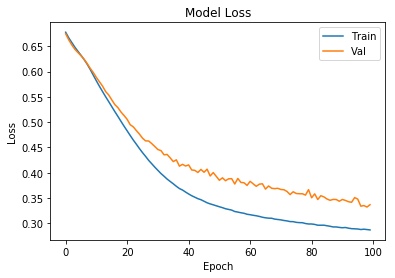

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

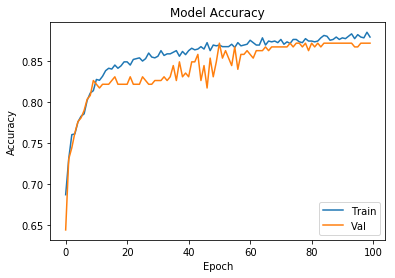

In [34]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'], loc='lower right')

## Adding Regularization

In [35]:
#bad overfit
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4506 - acc: 0.8004 - val_loss: 0.4683 - val_acc: 0.8402
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3539 - acc: 0.8493 - val_loss: 0.5179 - val_acc: 0.8630
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3107 - acc: 0.8728 - val_loss: 0.4437 - val_acc: 0.8539
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2871 - acc: 0.8816 - val_loss: 0.4434 - val_acc: 0.8447
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2784 - acc: 0.8806 - val_loss: 0.3168 - val_acc: 0.8813
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2742 - acc: 0.8875 - val_loss: 0.4530 - val_acc: 0.8584
Epoch 7/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.2981 - acc: 0.8748 - val_loss: 0.3781 - val_acc: 0.8858
Epoch 8/

Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1660 - acc: 0.9237 - val_loss: 0.3612 - val_acc: 0.9087
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1757 - acc: 0.9247 - val_loss: 0.3786 - val_acc: 0.8995
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1810 - acc: 0.9247 - val_loss: 0.3351 - val_acc: 0.9041
Epoch 64/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1530 - acc: 0.9335 - val_loss: 0.3610 - val_acc: 0.9132
Epoch 65/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1470 - acc: 0.9325 - val_loss: 0.3433 - val_acc: 0.9132
Epoch 66/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1752 - acc: 0.9295 - val_loss: 0.3360 - val_acc: 0.9178
Epoch 67/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1590 - acc: 0.9266 - val_loss: 0.3161 - val_acc: 0.9178
Epoch 68/100
1022/1022 [========================

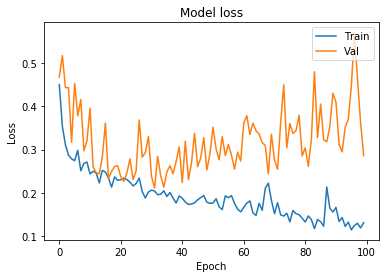

In [36]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

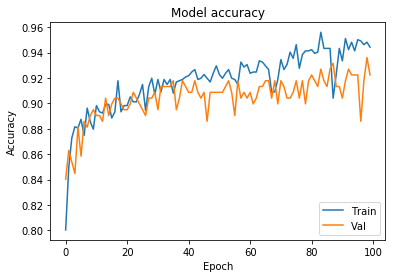

In [37]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [38]:
from keras.layers import Dropout
from keras import regularizers

In [40]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 5s 5ms/step - loss: 14.7194 - acc: 0.6810 - val_loss: 4.0721 - val_acc: 0.7900
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 1.7746 - acc: 0.8023 - val_loss: 0.7439 - val_acc: 0.8174
Epoch 3/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5823 - acc: 0.8562 - val_loss: 0.5366 - val_acc: 0.8630
Epoch 4/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5134 - acc: 0.8571 - val_loss: 0.5211 - val_acc: 0.8721
Epoch 5/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5105 - acc: 0.8562 - val_loss: 0.4978 - val_acc: 0.8630
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5152 - acc: 0.8474 - val_loss: 0.5663 - val_acc: 0.8493
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4871 - acc: 0.8679 - val_loss: 0.4783 - val_acc: 0.8767
Epoch 8

Epoch 61/100
1022/1022 [==============================] - 5s 5ms/step - loss: 0.4353 - acc: 0.8806 - val_loss: 0.4263 - val_acc: 0.8995
Epoch 62/100
1022/1022 [==============================] - 5s 5ms/step - loss: 0.4456 - acc: 0.8885 - val_loss: 0.4654 - val_acc: 0.8767
Epoch 63/100
1022/1022 [==============================] - 5s 5ms/step - loss: 0.4407 - acc: 0.8865 - val_loss: 0.4911 - val_acc: 0.8676
Epoch 64/100
1022/1022 [==============================] - 6s 5ms/step - loss: 0.4523 - acc: 0.8728 - val_loss: 0.4419 - val_acc: 0.8950
Epoch 65/100
1022/1022 [==============================] - 6s 6ms/step - loss: 0.4324 - acc: 0.8904 - val_loss: 0.4912 - val_acc: 0.8630
Epoch 66/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4275 - acc: 0.8845 - val_loss: 0.4439 - val_acc: 0.8813
Epoch 67/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4320 - acc: 0.8816 - val_loss: 0.4250 - val_acc: 0.8950
Epoch 68/100
1022/1022 [========================

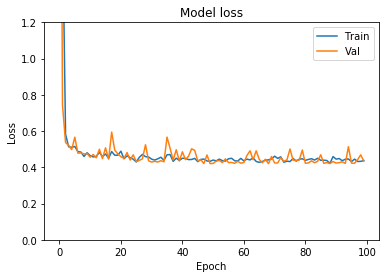

In [41]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

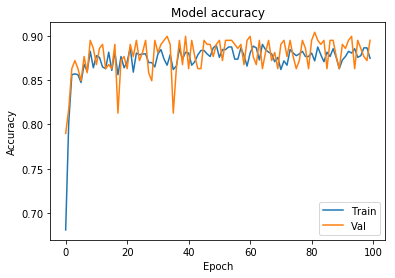

In [42]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()